In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from numpy import cos, sin
import math

import subprocess
import os
import time

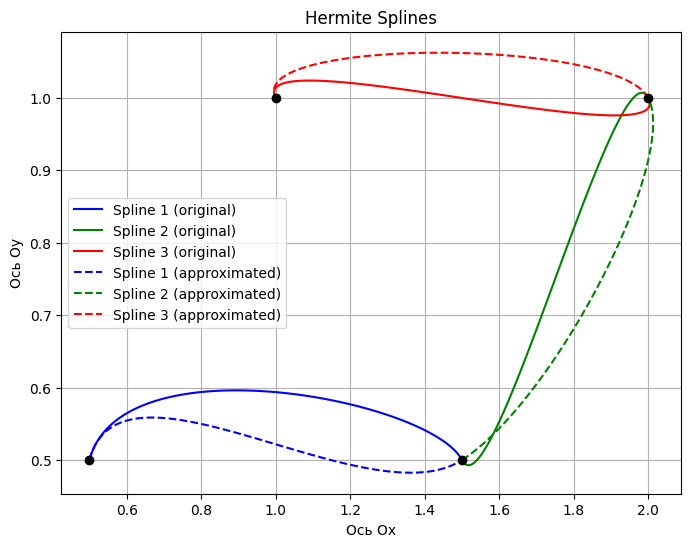

In [2]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([[0.5, 0.5], [1.5, 0.5], [2.0, 1.0], [1.0, 1.0]])

V = np.array([[0.25, 0.5], [0.25, -0.25], [0.25, -0.25], [0.25, -0.25]])

def h00(t):
    return 2 * t**3 - 3 * t**2 + 1

def h10(t):
    return t**3 - 2 * t**2 + t

def h01(t):
    return -2 * t**3 + 3 * t**2

def h11(t):
    return t**3 - t**2

def hermite_spline(P0, P1, V0, V1, t):
    return (h00(t) * P0 +
            h10(t) * V0 +
            h01(t) * P1 +
            h11(t) * V1)

t_values = np.linspace(0, 1, 100)
spline1 = np.array([hermite_spline(P[0], P[1], V[0], V[1], t) for t in t_values])
spline2 = np.array([hermite_spline(P[1], P[2], V[1], V[2], t) for t in t_values])
spline3 = np.array([hermite_spline(P[2], P[3], V[2], V[3], t) for t in t_values])

V1_approx = (P[2] - P[0]) / 2
V2_approx = (P[3] - P[1]) / 2

spline1_approx = np.array([hermite_spline(P[0], P[1], V[0], V1_approx, t) for t in t_values])
spline2_approx = np.array([hermite_spline(P[1], P[2], V1_approx, V2_approx, t) for t in t_values])
spline3_approx = np.array([hermite_spline(P[2], P[3], V2_approx, V[3], t) for t in t_values])

plt.figure(figsize=(8, 6))

plt.plot(spline1[:, 0], spline1[:, 1], label='Spline 1 (original)', color='blue')
plt.plot(spline2[:, 0], spline2[:, 1], label='Spline 2 (original)', color='green')
plt.plot(spline3[:, 0], spline3[:, 1], label='Spline 3 (original)', color='red')

plt.plot(spline1_approx[:, 0], spline1_approx[:, 1], '--', label='Spline 1 (approximated)', color='blue')
plt.plot(spline2_approx[:, 0], spline2_approx[:, 1], '--', label='Spline 2 (approximated)', color='green')
plt.plot(spline3_approx[:, 0], spline3_approx[:, 1], '--', label='Spline 3 (approximated)', color='red')

plt.scatter(P[:, 0], P[:, 1], color='black', zorder=5)

plt.title("Hermite Splines")
plt.xlabel("Ось Ox")
plt.ylabel("Ось Oy")
plt.legend()
plt.grid(True)
plt.show()


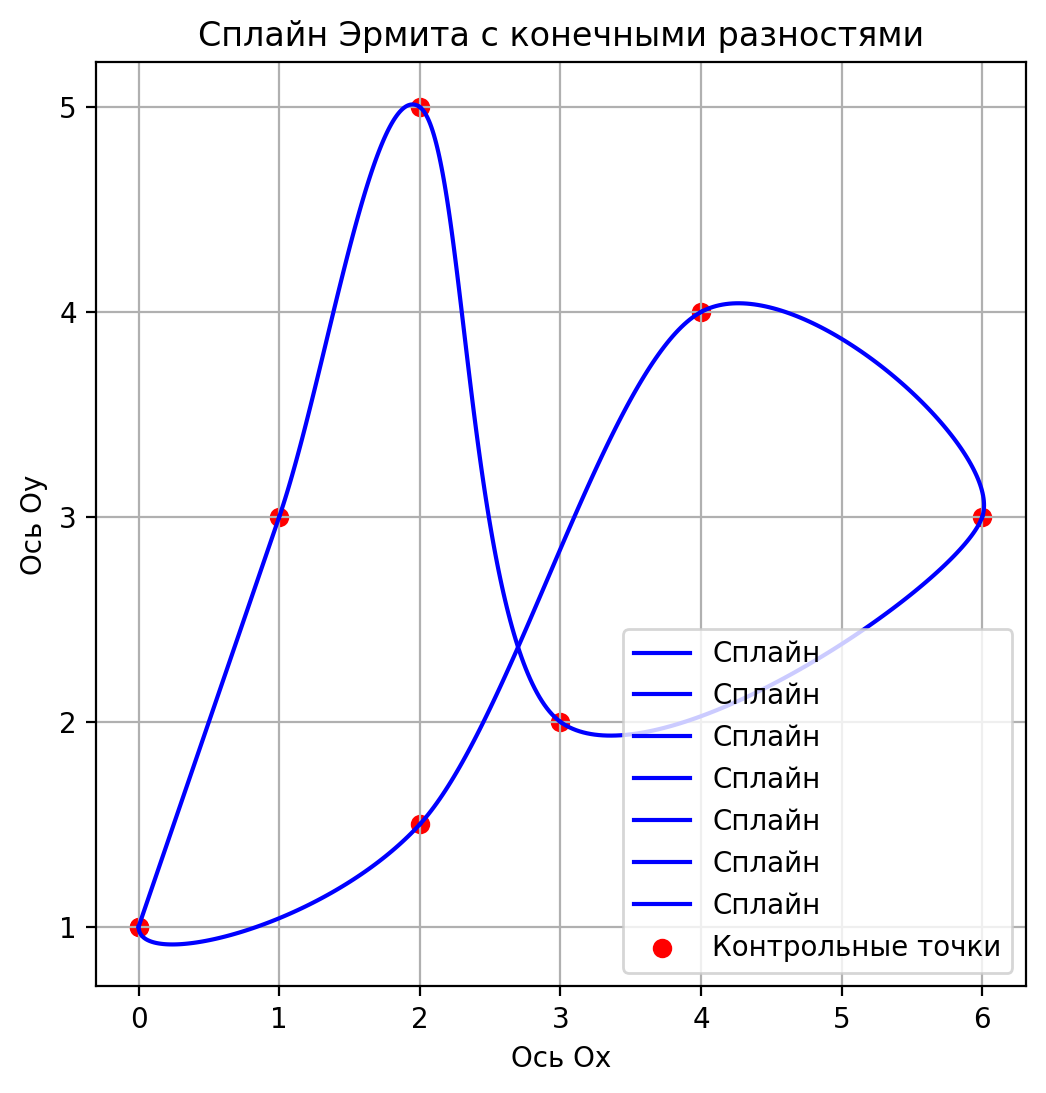

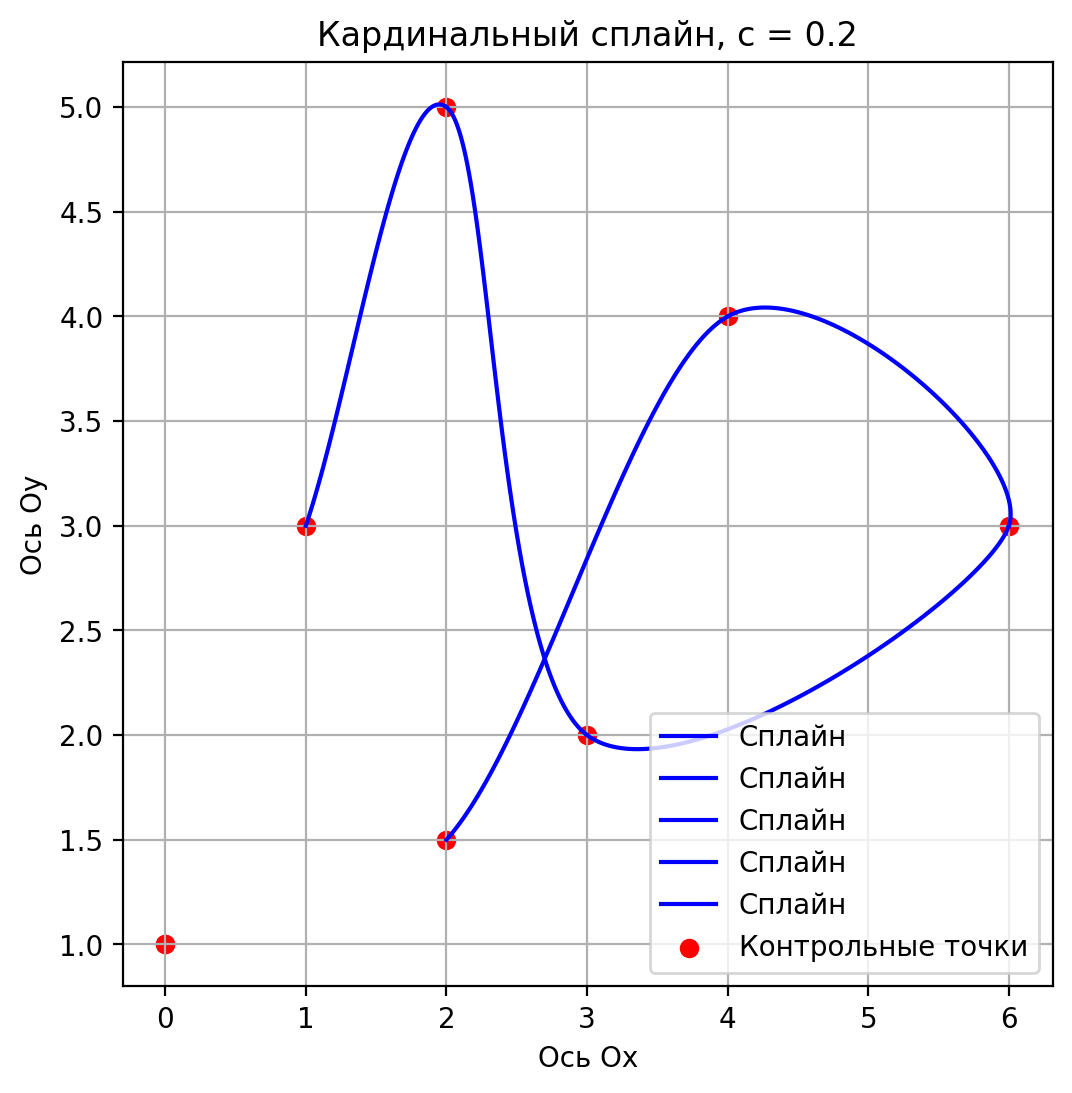

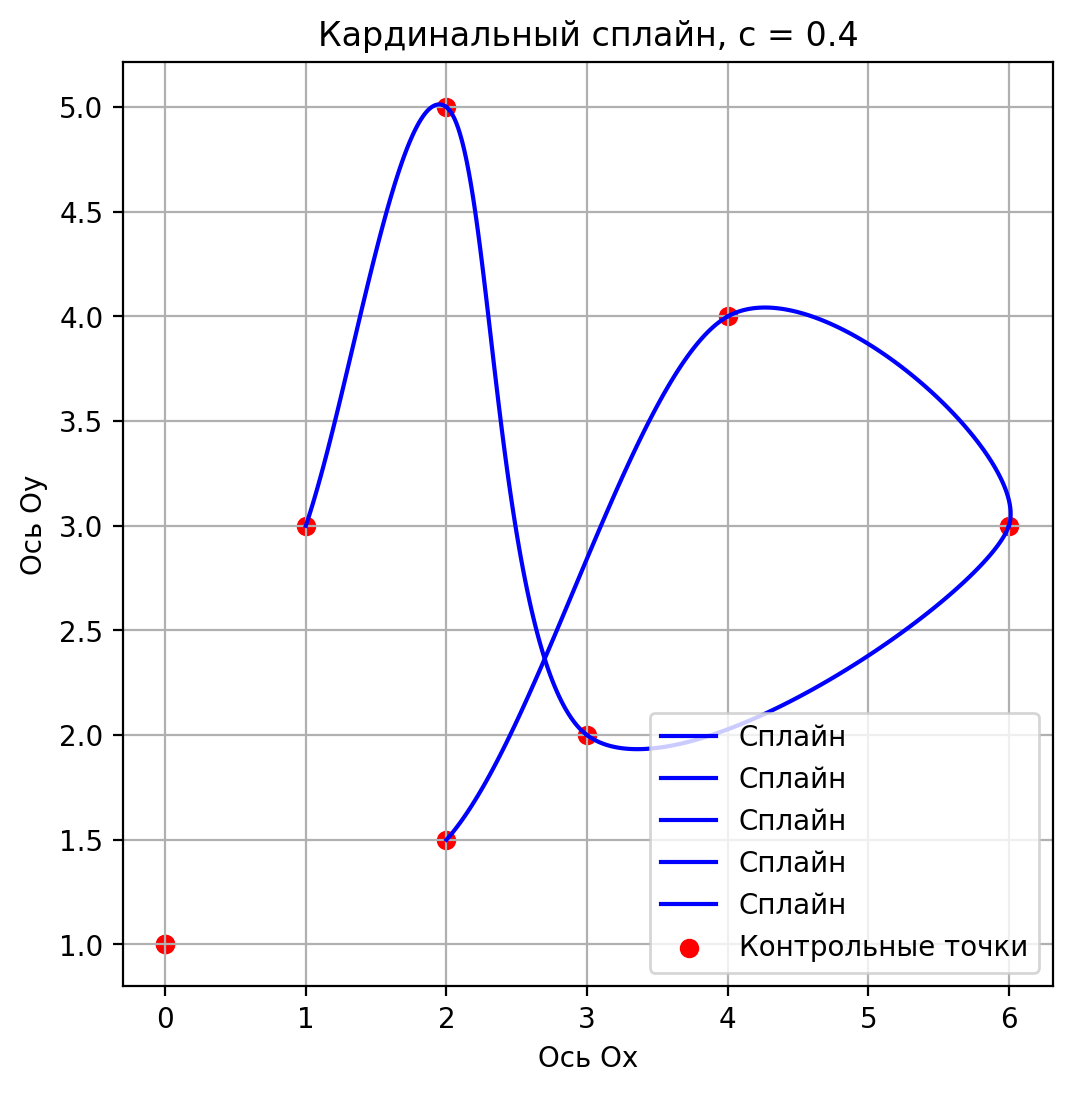

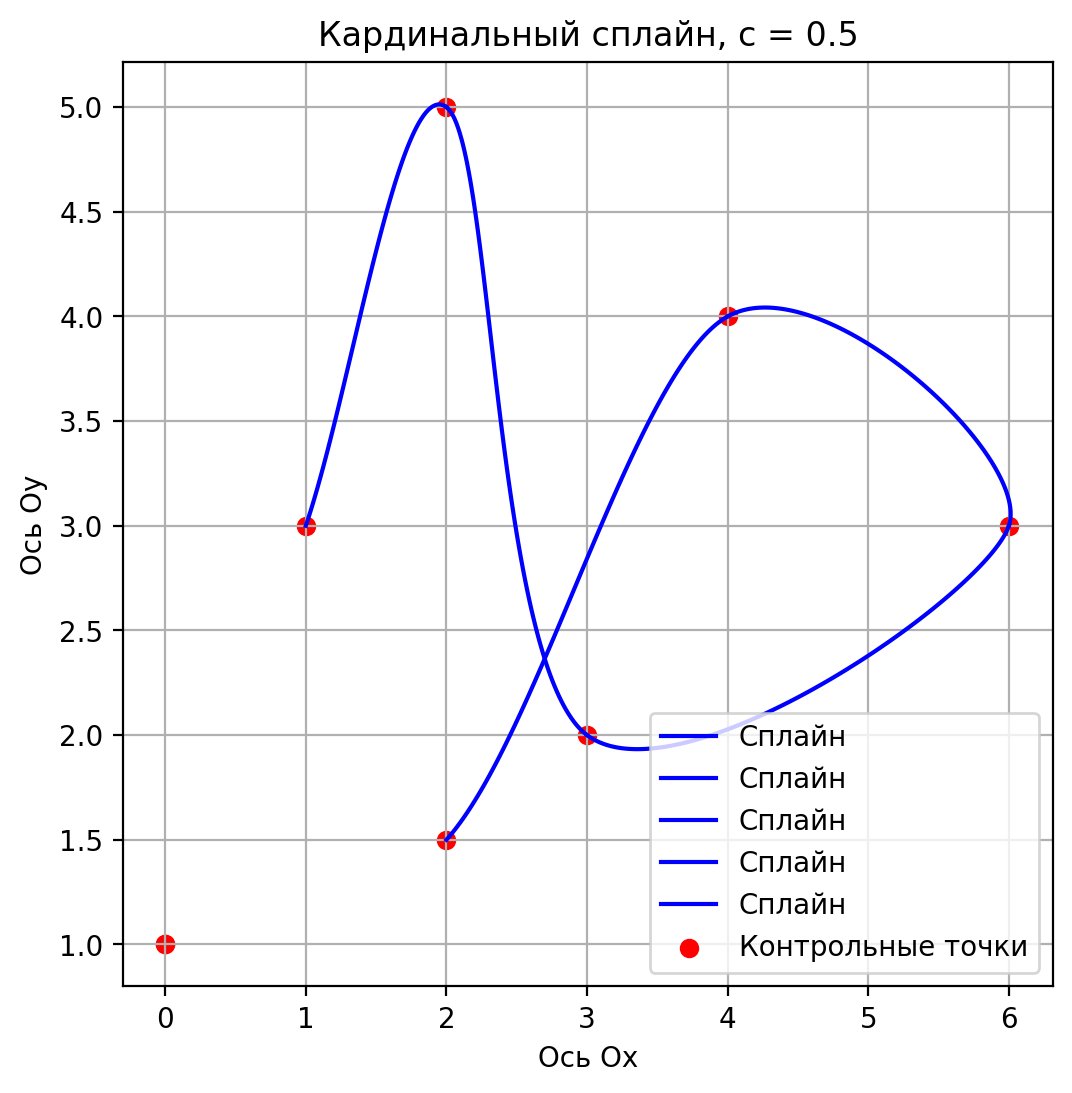

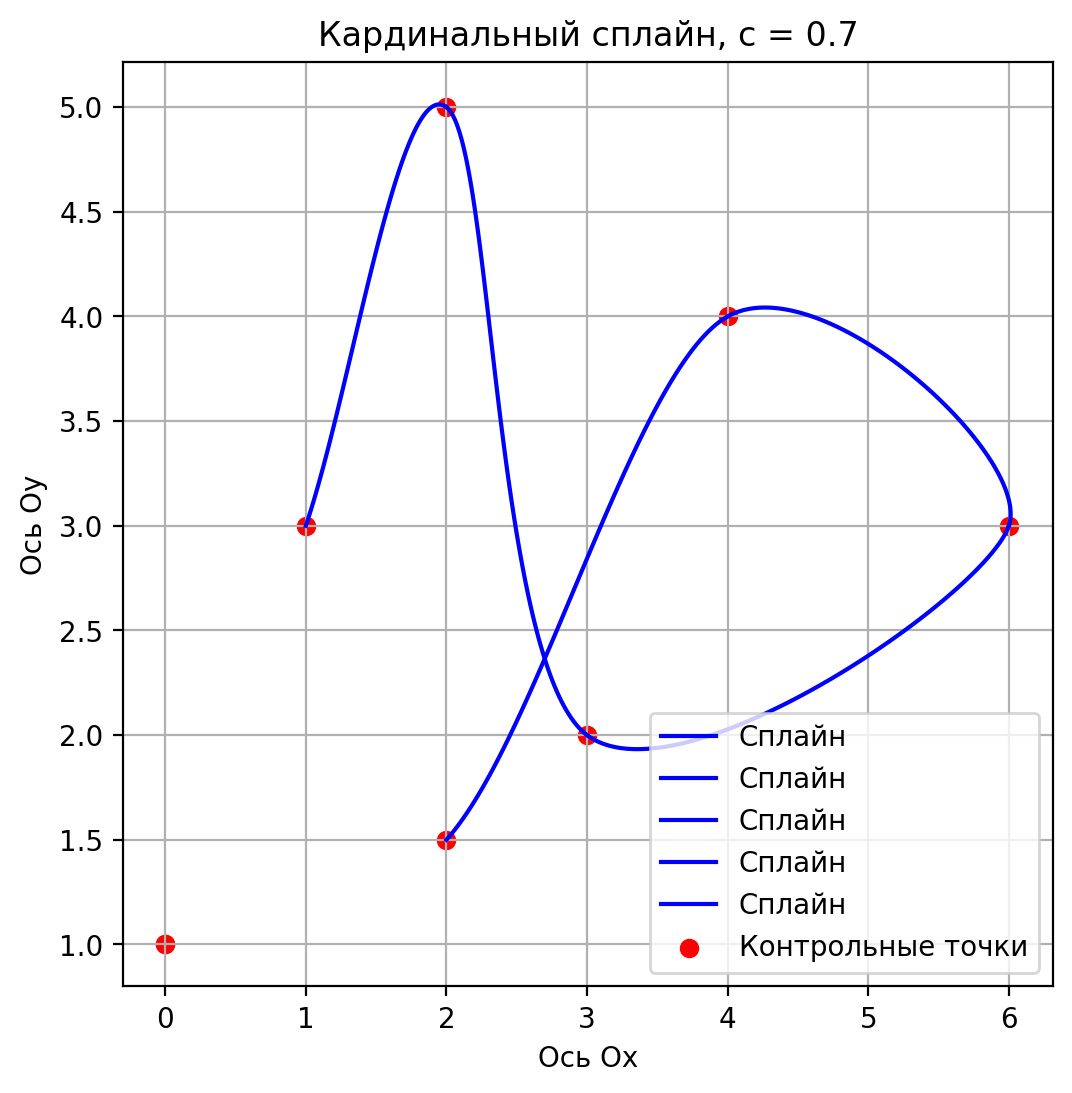

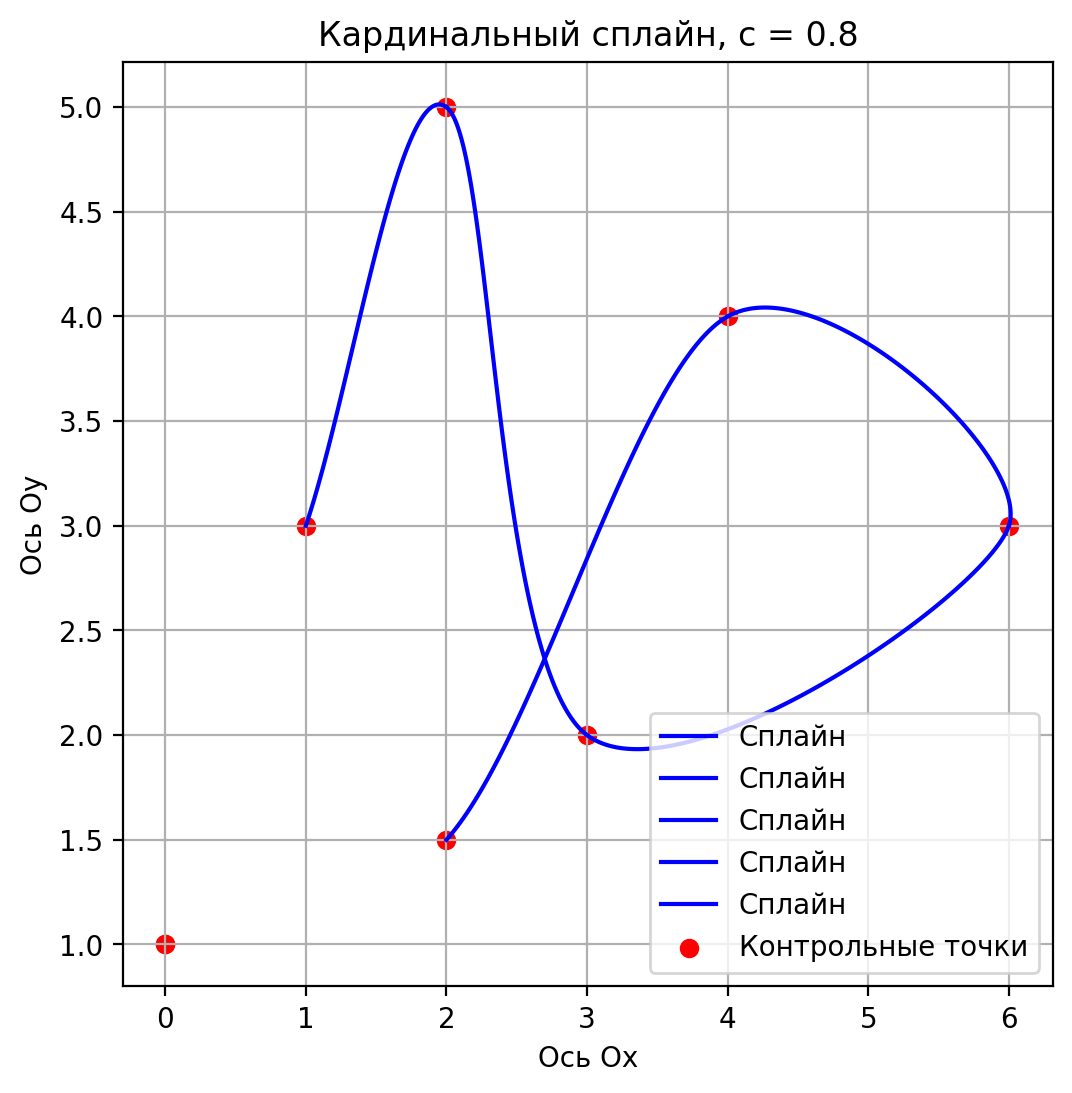

In [24]:

P = np.array([[0,1], [1, 3], [2, 5], [3, 2], [6, 3], [4, 4], [2, 1.5], [0,1]])

def triple_finite_differences(P):
    V = np.zeros_like(P)
    V[0] = (P[2] - 2*P[1] + P[0]) / 3  
    V[-1] = (P[-1] - 2 * P[-2] + P[-3]) / 3
    for i in range(1, len(P) - 1):
        V[i] = (P[i + 1] - P[i - 1]) / 2
    return V

def cardinal_spline(P, c):
    V = np.zeros_like(P)
    V[0] = (1 - c) * (P[1] - P[0]) / 2
    V[-1] = (1 - c) * (P[-1] - P[-2]) / 2
    for i in range(1, len(P) - 1):
        V[i] = (P[i + 1] - P[i - 1]) / 2
    return V

def h00(t):
    return 2 * t ** 3 - 3 * t ** 2 + 1

def h10(t):
    return t ** 3 - 2 * t ** 2 + t

def h01(t):
    return -2 * t ** 3 + 3 * t ** 2

def h11(t):
    return t ** 3 - t ** 2

def hermite_spline(P0, P1, V0, V1, t):
    return h00(t) * P0 + h10(t) * V0 + h01(t) * P1 + h11(t) * V1

def plot_spline(P, V, title):
    t_values = np.linspace(0, 1, 100)
    plt.figure(figsize=(6, 6), dpi=200)
    for i in range(len(P)-1):
        segment = np.array([hermite_spline(P[i], P[i + 1], V[i], V[i + 1], t) for t in t_values])
        plt.plot(segment[:, 0], segment[:, 1], label='Сплайн', color='blue')
    
    plt.scatter(P[:, 0], P[:, 1], color='red', label='Контрольные точки')
    plt.title(title)
    plt.xlabel("Ось Ox")
    plt.ylabel("Ось Oy")
    plt.grid(True)
    plt.legend()
    plt.show()

V_fd = triple_finite_differences(P)
plot_spline(P, V_fd, "Сплайн Эрмита с конечными разностями")

def plot_card_spline(P, V, title):
    t_values = np.linspace(0, 1, 100)
    plt.figure(figsize=(6, 6), dpi=200)
    for i in range(1, len(P)-2):
        segment = np.array([hermite_spline(P[i], P[i + 1], V[i], V[i + 1], t) for t in t_values])
        plt.plot(segment[:, 0], segment[:, 1], label='Сплайн', color='blue')
    
    plt.scatter(P[:, 0], P[:, 1], color='red', label='Контрольные точки')
    plt.title(title)
    plt.xlabel("Ось Ox")
    plt.ylabel("Ось Oy")
    plt.grid(True)
    plt.legend()
    plt.show()

for c in [0.2, 0.4, 0.5, 0.7, 0.8]:
    V_cardinal = cardinal_spline(P, c)
    plot_card_spline(P, V_cardinal, f"Кардинальный сплайн, c = {c}")

In [4]:
P1 = [(13, 23), (15, 23), (16, 24), (16, 26), (15, 27), (13, 27), (12, 26), (12, 24), (13, 23)]
P2 = [(9, 9), (9, 15), (11, 17), (23, 17), (25, 15), (25, 9)]
P3 = [(5, 22), (4, 23), (3, 23), (1, 21), (1, 20), (2, 19), (1, 18), (1, 16), (3, 15), (4, 15), (5, 16)]
P4 = [(29, 16), (30, 15), (31, 15), (33, 17), (33, 18), (32, 19), (33, 20), (33, 22), (31, 23), (30, 23), (29, 22)]
P5 = [(17, 24), (19, 22), (24, 22), (26, 24), (26, 29), (24, 31), (19, 31), (17, 29), (17, 24)]
P6 = [(11, 9), (11, 7), (9, 6), (9, 5), (11, 6), (11, 4), (12, 4), (12, 6), (14, 5), (14, 6), (12, 7), (12, 9)]
P7 = [(17, 29), (15, 31), (10, 31), (8, 29), (8, 24), (10, 22), (15, 22), (17, 24)]
P8 = [(19, 22), (17, 18), (15, 22)]
P9 = [(22, 9), (22, 7), (20, 6), (20, 5), (22, 6), (22, 4), (23, 4), (23, 6), (25, 5), (25, 6), (23, 7), (23, 9)]
P10 = [(19, 27), (21, 27), (22, 26), (22, 24), (21, 23), (19, 23), (18, 24), (18, 26), (19, 27)]
P11 = [(29, 10), (29, 9), (5, 9), (5, 36), (9, 33), (25, 33), (29, 36), (29, 10)]
P = [P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11]

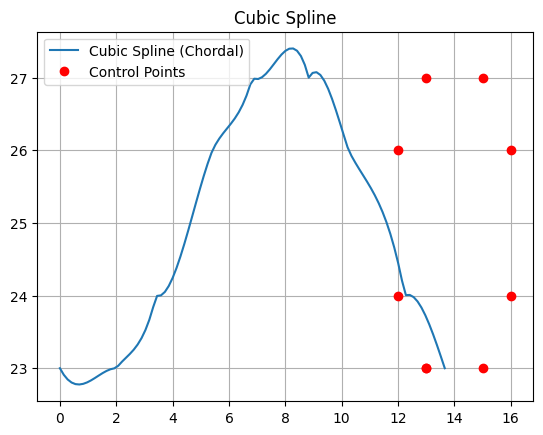

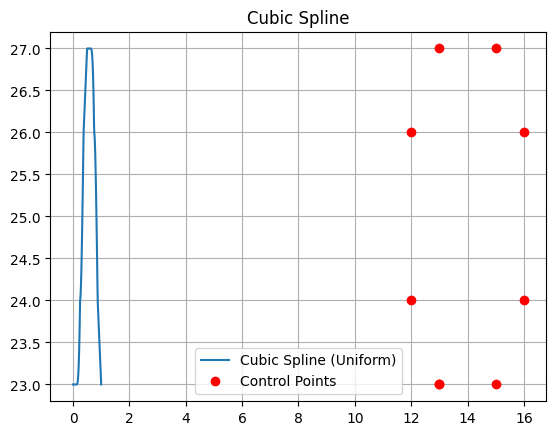

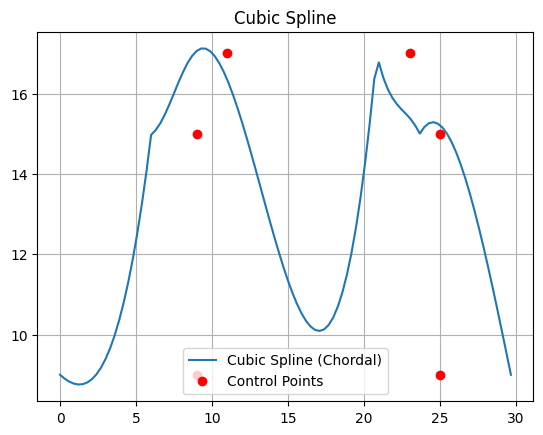

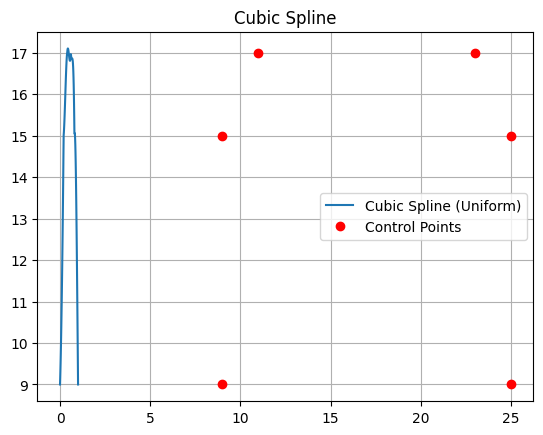

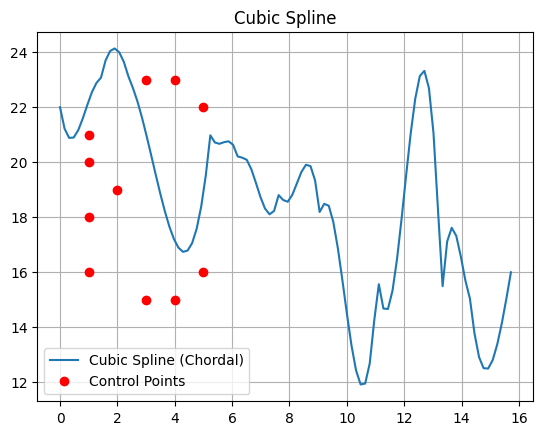

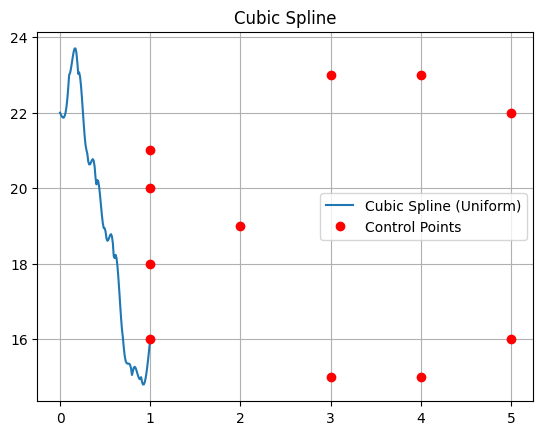

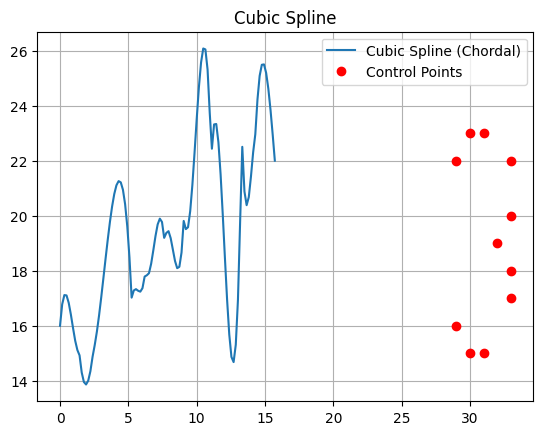

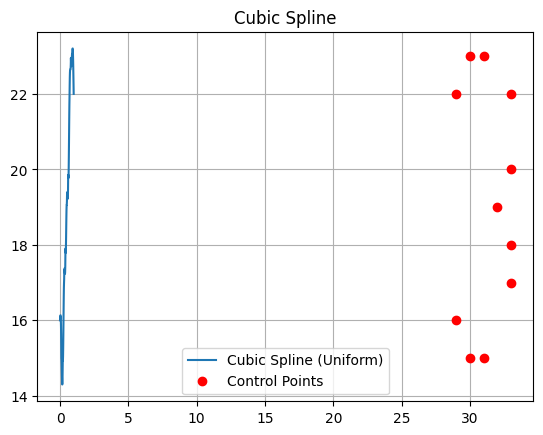

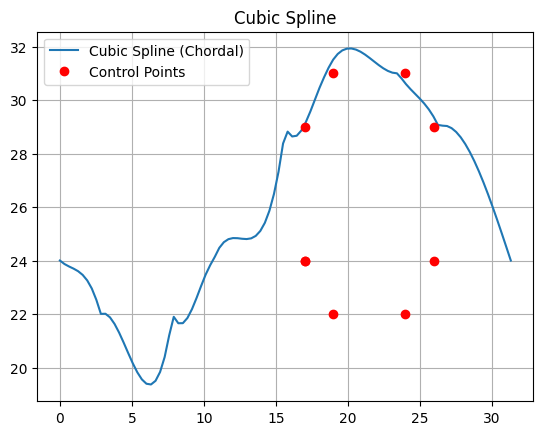

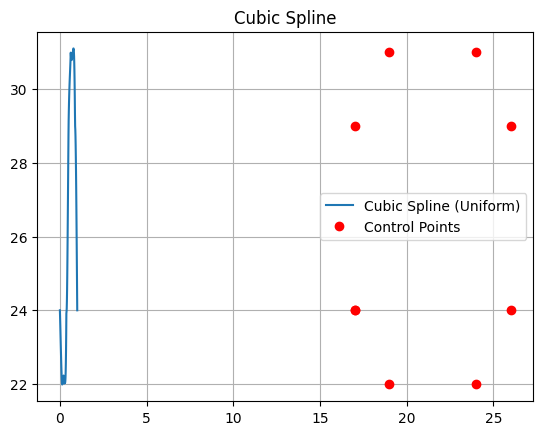

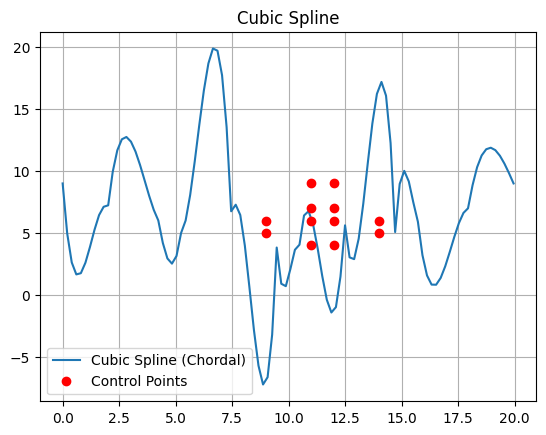

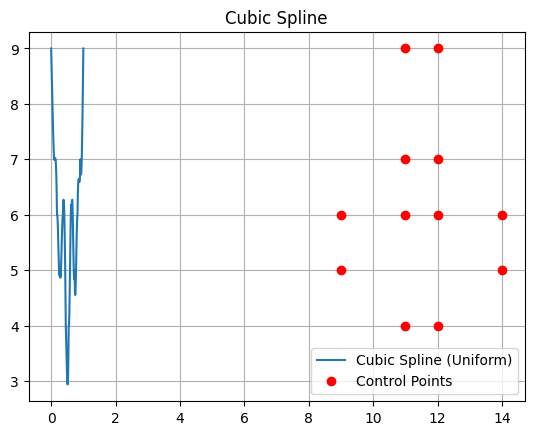

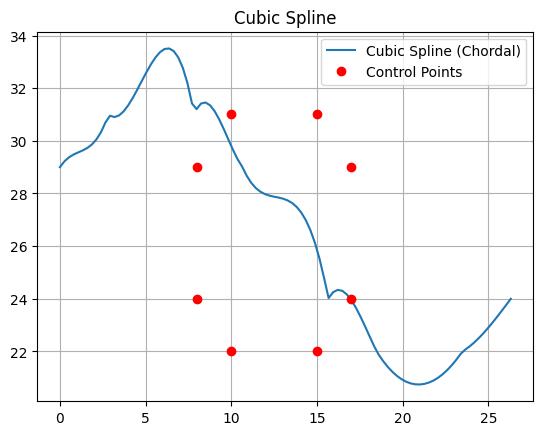

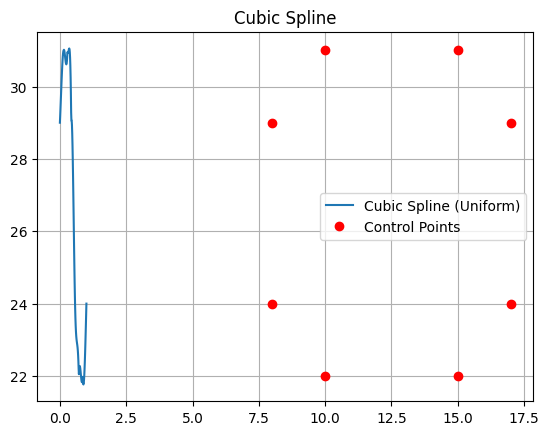

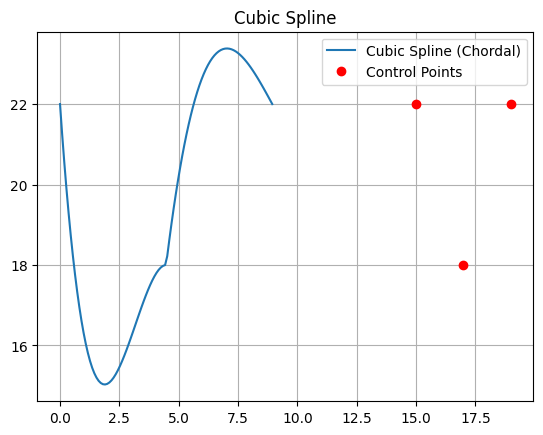

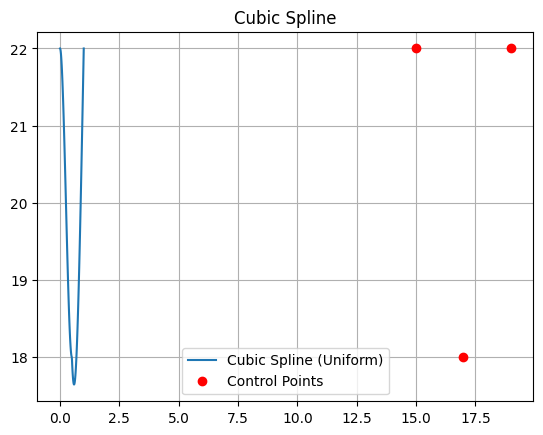

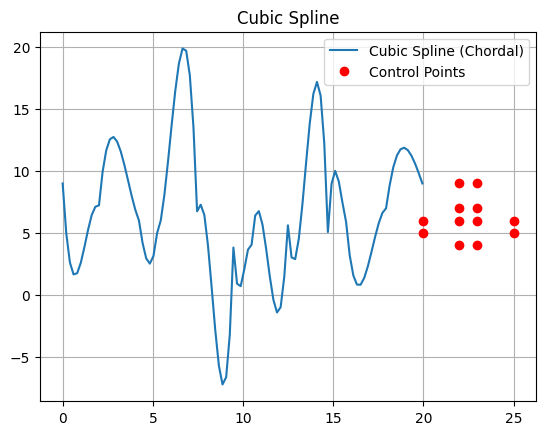

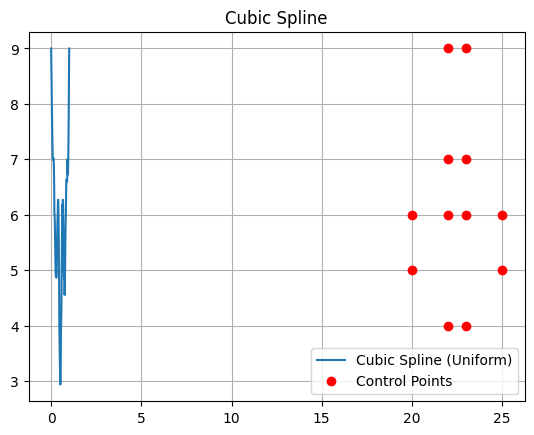

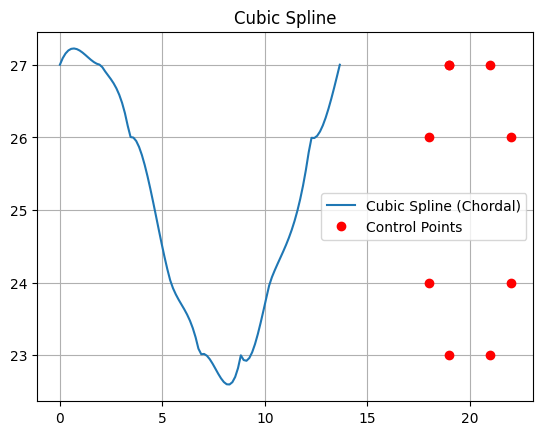

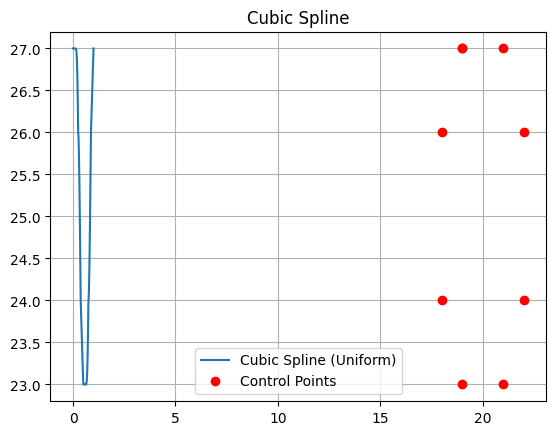

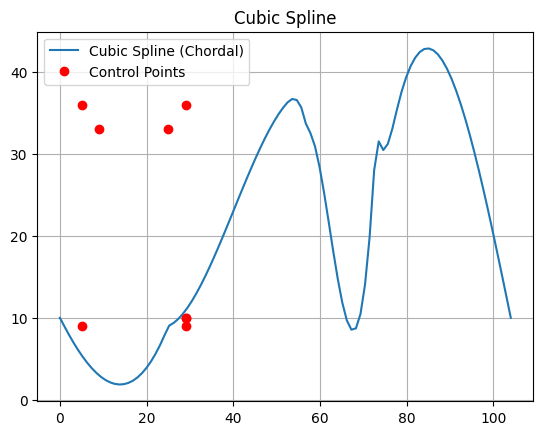

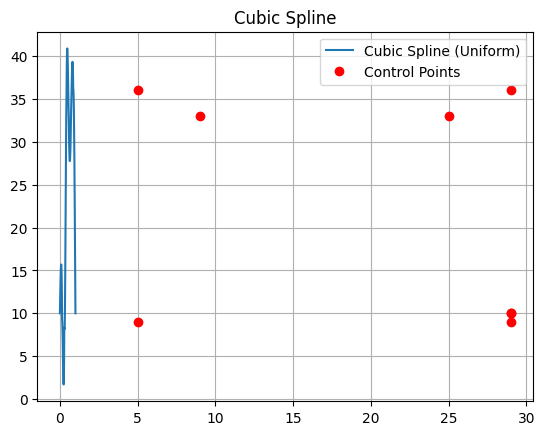

In [5]:
def chordal_parameterization(points):
    t = np.zeros(len(points))
    for i in range(1, len(points)):
        t[i] = t[i - 1] + np.linalg.norm(np.array(points[i]) - np.array(points[i - 1]))
    return t

def uniform_parameterization(points):
    return np.linspace(0, 1, len(points))

def cubic_spline(points, t):
    n = len(points) - 1
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)
    
    for i in range(n):
        A[i, i] += 2 * (t[i + 1] - t[i])
        if i > 0:
            A[i, i - 1] += (t[i] - t[i - 1])
        if i < n - 1:
            A[i, i + 1] += (t[i + 1] - t[i])
        
        b[i] = 3 * (points[i + 1][1] - points[i][1]) / (t[i + 1] - t[i])  
    
    A[0, 0] = 1
    A[n, n] = 1
    
    c = np.linalg.solve(A, b)
    
    a = [p[1] for p in points]  
    b_coeff = np.zeros(n)  
    d = np.zeros(n)
    
    for i in range(n):
        h = t[i + 1] - t[i]
        b_coeff[i] = (points[i + 1][1] - points[i][1]) / h - h * (c[i + 1] + 2 * c[i]) / 3
        d[i] = (c[i + 1] - c[i]) / (3 * h)
    
    return a, b_coeff, c, d

def evaluate_spline(a, b, c, d, t, t_eval):
    S = []
    for x in t_eval:
        for i in range(len(t) - 1):
            if t[i] <= x <= t[i + 1]:
                dx = x - t[i]
                S.append(a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3)
                break
    return S

for Pi in P:
    for param_method, label in zip([chordal_parameterization, uniform_parameterization], ['Chordal', 'Uniform']):
        points = Pi
        t_chordal = param_method(points)
        a, b, c, d = cubic_spline(points, t_chordal)
        
        # Plotting
        x_eval = np.linspace(t_chordal[0], t_chordal[-1], 100)
        y_eval = evaluate_spline(a, b, c, d, t_chordal, x_eval)
        
        x_coords = [p[0] for p in points]
        
        plt.plot(x_eval, y_eval, label=f'Cubic Spline ({label})')
        plt.plot(x_coords, [p[1] for p in points], 'ro', label='Control Points')
        plt.title("Cubic Spline")
        plt.legend()
        plt.grid()
        plt.show()